# Emergency 911 Calls Data

In [1]:
# import libraries
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
#importing the dataset into Pandas Dataframe
df=pd.read_csv(r"C:\Users\PRAVEENA PRAKASH\911 calls.csv")

In [4]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


In [5]:
df.shape

(663522, 9)

In [6]:
df.columns

Index(['lat', 'lng', 'desc', 'zip', 'title', 'timeStamp', 'twp', 'addr', 'e'], dtype='object')

## Data Schema

lat : Latitude coordinates of the emergency call location

lng : Longitude coordinates of the emergency call location

desc : Description of the emergency incident

zip : ZIP code of the incident location

title : Title/category of the emergency call like EMS, Fire, Traffic etc.

timeStamp : Date and time when the call was made 

twp : Township information

addr : Street address of the incident

e : Dummy variable (always 1)

In [7]:
df.describe()

,lat,lng,zip,e
count,663522.000000,663522.000000,583323.000000,663522.0
mean,40.158162,-75.300105,19236.055791,1.0
std,0.220641,1.672884,298.222637,0.0
min,0.000000,-119.698206,1104.000000,1.0
25%,40.100344,-75.392735,19038.000000,1.0
50%,40.143927,-75.305143,19401.000000,1.0
75%,40.229008,-75.211865,19446.000000,1.0
max,51.335390,87.854975,77316.000000,1.0


## Data Cleaning

In [8]:
# Check about missing values to decide whether need to make any data cleaning or not
df.isnull().sum()

lat              0
lng              0
desc             0
zip          80199
title            0
timeStamp        0
twp            293
addr             0
e                0
dtype: int64

Here, 80199 missing values in zip column and 293 missing values in twp column  are exists.

In [9]:
# Let's first examine the missing data pattern more closely
print("Percentage of missing values:")
print(f"zip: {(df['zip'].isnull().sum() / len(df)) * 100:.2f}%")
print(f"twp: {(df['twp'].isnull().sum() / len(df)) * 100:.2f}%")

# Check if there's any correlation between missing zip and twp values
print(f"\nRows with both zip and twp missing: {df[df['zip'].isnull() & df['twp'].isnull()].shape[0]}")

Percentage of missing values:
zip: 12.09%
twp: 0.04%

Rows with both zip and twp missing: 169


In [10]:
# Extract rows where twp column has missing values
missing_twp_rows = df[df['twp'].isnull()]

# Display the rows with missing twp values
missing_twp_rows.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
1635,40.162804,-75.097848,TURNPIKE OVERPASS; ; 2015-12-14 @ 21:36:52-Sta...,19040.0,Fire: VEHICLE ACCIDENT,2015-12-14 21:36:52,NaN,TURNPIKE OVERPASS,1
1821,40.099265,-75.175706,CHURCH RD; ; Station 322; 2015-12-15 @ 11:31:36;,NaN,EMS: UNKNOWN MEDICAL EMERGENCY,2015-12-15 11:31:36,NaN,CHURCH RD,1
5455,40.222272,-75.138302,GIANT; ; 2015-12-24 @ 17:30:07-Station:STA98;,18976.0,Fire: VEHICLE ACCIDENT,2015-12-24 17:30:07,NaN,GIANT,1
7281,40.113517,-75.332257,HIGH ST; ; Station 329; 2015-12-30 @ 03:32:49;,19401.0,EMS: VEHICLE ACCIDENT,2015-12-30 03:32:49,NaN,HIGH ST,1
7282,40.113517,-75.332257,HIGH ST; ; 2015-12-30 @ 03:32:28-Station:STA58;,19401.0,Fire: VEHICLE ACCIDENT,2015-12-30 03:32:28,NaN,HIGH ST,1


While we examine the dataset, in the null value case of 'twp' column, we can analyze that the address and 'twp' are directly connectes and same.So that we can fill the  missing values of 'twp' with it's corresponding 'addr' 

In [11]:
# Fill missing values in 'twp' column with corresponding 'addr' values
df['twp'].fillna(df['addr'], inplace=True)
df.isnull().sum()

lat              0
lng              0
desc             0
zip          80199
title            0
timeStamp        0
twp              0
addr             0
e                0
dtype: int64

In [12]:
# Display first 10 rows with null zip values

df[df['zip'].isnull()].head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1
10,40.231990,-75.251891,RT202 PKWY & KNAPP RD; MONTGOMERY; 2015-12-10 ...,NaN,Traffic: VEHICLE ACCIDENT -,2015-12-10 17:33:50,MONTGOMERY,RT202 PKWY & KNAPP RD,1
14,40.097222,-75.376195,SCHUYLKILL EXPY & CROTON RD UNDERPASS; UPPER M...,NaN,Traffic: VEHICLE ACCIDENT -,2015-12-10 17:09:49,UPPER MERION,SCHUYLKILL EXPY & CROTON RD UNDERPASS,1
23,40.143326,-75.422819,RT422 & PAWLINGS RD OVERPASS; LOWER PROVIDENC...,NaN,Traffic: DISABLED VEHICLE -,2015-12-10 18:00:38,LOWER PROVIDENCE,RT422 & PAWLINGS RD OVERPASS,1
24,40.153268,-75.189558,SUMMIT AVE & RT309 UNDERPASS; UPPER DUBLIN; 20...,NaN,Traffic: VEHICLE ACCIDENT -,2015-12-10 17:58:22,UPPER DUBLIN,SUMMIT AVE & RT309 UNDERPASS,1


we can fill the missing zip code values by finding the most common zip code for each township.

In [13]:
# First, let's examine the relationship between townships and zip codes
print("Analyzing township-zip relationships...")

# Get all rows where zip is not null to establish township-zip mappings
zip_twp_mapping = df[df['zip'].notna()].groupby('twp')['zip'].agg(['count', lambda x: x.mode().iloc[0] if len(x.mode()) > 0 else None]).reset_index()
zip_twp_mapping.columns = ['twp', 'count', 'most_common_zip']

print("Township-Zip mappings (top 10):")
print(zip_twp_mapping.head(10))

Analyzing township-zip relationships...
Township-Zip mappings (top 10):
                         twp  count  most_common_zip
0                   ABINGTON  38137          19046.0
1                    AIRBASE      1          19504.0
2                     AMBLER   4397          19002.0
3                  ANDERS RD      2          19426.0
4  ARDEN RD & UPPER GULPH RD      1          19087.0
5                     AYR LN      1          19025.0
6                   BEECH ST      1          19464.0
7                BELMONT AVE      1          19002.0
8               BERKS COUNTY   1321          19512.0
9                     BIG RD      1          19525.0


In [14]:
df.isnull().sum()

lat              0
lng              0
desc             0
zip          80199
title            0
timeStamp        0
twp              0
addr             0
e                0
dtype: int64

In [15]:
# More efficient approach using groupby and map
# Create a mapping of township to most common zip
township_zip_map = (df[df['zip'].notna()]
                   .groupby('twp')['zip']
                   .agg(lambda x: x.mode().iloc[0] if len(x.mode()) > 0 else None)
                   .to_dict())

# Fill missing values using the mapping
mask = df['zip'].isnull()
df.loc[mask, 'zip'] = df.loc[mask, 'twp'].map(township_zip_map)
df.isnull().sum()

lat            0
lng            0
desc           0
zip          168
title          0
timeStamp      0
twp            0
addr           0
e              0
dtype: int64

In [16]:
# Get townships that still have missing zip values
remaining_nulls = df[df['zip'].isnull()]['twp'].value_counts()
print(f"Townships with remaining null zip values:")
print(remaining_nulls.head())



Townships with remaining null zip values:
twp
NO LOCATION - NEIGHBORING COUNTY    118
SKIPPACK PIKE                         3
DEKALB PIKE                           3
CHURCH RD                             2
GRAVEL PENNDOT                        2
Name: count, dtype: int64


In [17]:
# Replace all occurrences of 'NO LOCATION - NEIGHBORING COUNTY' with 'NO LOCATION - NEIGHBORING COUNTRY'
df = df.replace('NO LOCATION - NEIGHBORING COUNTY', 'NO LOCATION - NEIGHBORING COUNTRY')

In [18]:
# Check if the value exists using isin method
df['twp'].isin(['NO LOCATION - NEIGHBORING COUNTRY']).any()

True

In [19]:
# Find all rows where zip is null
null_zip_rows = df[df['zip'].isnull()]
print(f"Number of rows with null zip values: {len(null_zip_rows)}")
print("\nFirst few rows with null zip values:")
null_zip_rows.head()

Number of rows with null zip values: 168

First few rows with null zip values:


,lat,lng,desc,zip,title,timeStamp,twp,addr,e
1821,40.099265,-75.175706,CHURCH RD; ; Station 322; 2015-12-15 @ 11:31:36;,NaN,EMS: UNKNOWN MEDICAL EMERGENCY,2015-12-15 11:31:36,CHURCH RD,CHURCH RD,1
10103,40.229008,-75.387852,DEAD END; ; Station 318; 2016-01-06 @ 23:11:54;,NaN,EMS: OVERDOSE,2016-01-06 23:11:54,DEAD END,DEAD END,1
28851,40.229008,-75.387852,NO LOCATION - NEIGHBORING COUNTY; ; Station 3...,NaN,EMS: SUBJECT IN PAIN,2016-02-20 22:17:11,NO LOCATION - NEIGHBORING COUNTRY,NO LOCATION - NEIGHBORING COUNTRY,1
36306,40.229008,-75.387852,NO LOCATION - NEIGHBORING COUNTY; ; Station 3...,NaN,EMS: LACERATIONS,2016-03-11 14:11:44,NO LOCATION - NEIGHBORING COUNTRY,NO LOCATION - NEIGHBORING COUNTRY,1
36801,40.229008,-75.387852,NO LOCATION - NEIGHBORING COUNTY; ; Station 3...,NaN,EMS: OVERDOSE,2016-03-12 21:11:33,NO LOCATION - NEIGHBORING COUNTRY,NO LOCATION - NEIGHBORING COUNTRY,1


In [20]:
# Group by township to see which townships have null zip values
township_null_distribution = df[df['zip'].isnull()]['twp'].value_counts()
print("Distribution of null zip values by township:")
print(township_null_distribution)

Distribution of null zip values by township:
twp
NO LOCATION - NEIGHBORING COUNTRY    118
SKIPPACK PIKE                          3
DEKALB PIKE                            3
CHURCH RD                              2
GRAVEL PENNDOT                         2
PUUR HOUSE                             2
DEAD END                               2
PHILA%                                 2
TERWOOD RD                             2
RT422 OVERPASS                         2
GRYNEED CROSS                          1
OLD LANCAST                            1
MANAYUNK VIADUCT                       1
BO                                     1
RAMP N GULPH RD TO I76 WB              1
GERM 845                               1
OLD GULPH RD                           1
SALFORDVILLE RD                        1
RAMP RT422 WB TO TOWNSHIP LINE RD      1
PERKIOMEN CREEK RD                     1
SULLIVANS TRL                          1
SYLVANIA AVENUE                        1
BRYANT                                 1
VAUGH LE

In [21]:
# Update the desc column to replace 'NO LOCATION - NEIGHBORING COUNTY;' with 'NO LOCATION - NEIGHBORING COUNTRY;'
df['desc'] = df['desc'].str.replace('NO LOCATION - NEIGHBORING COUNTY;', 'NO LOCATION - NEIGHBORING COUNTRY;')

# Find all rows where twp column equals 'NO LOCATION - NEIGHBORING COUNTRY'
neighboring_country_rows = df[df['twp'] == 'NO LOCATION - NEIGHBORING COUNTRY']
neighboring_country_rows.head(10)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
28851,40.229008,-75.387852,NO LOCATION - NEIGHBORING COUNTRY; ; Station ...,NaN,EMS: SUBJECT IN PAIN,2016-02-20 22:17:11,NO LOCATION - NEIGHBORING COUNTRY,NO LOCATION - NEIGHBORING COUNTRY,1
36306,40.229008,-75.387852,NO LOCATION - NEIGHBORING COUNTRY; ; Station ...,NaN,EMS: LACERATIONS,2016-03-11 14:11:44,NO LOCATION - NEIGHBORING COUNTRY,NO LOCATION - NEIGHBORING COUNTRY,1
36801,40.229008,-75.387852,NO LOCATION - NEIGHBORING COUNTRY; ; Station ...,NaN,EMS: OVERDOSE,2016-03-12 21:11:33,NO LOCATION - NEIGHBORING COUNTRY,NO LOCATION - NEIGHBORING COUNTRY,1
37099,40.229008,-75.387852,NO LOCATION - NEIGHBORING COUNTRY; ; Station ...,NaN,EMS: UNCONSCIOUS SUBJECT,2016-03-13 19:55:43,NO LOCATION - NEIGHBORING COUNTRY,NO LOCATION - NEIGHBORING COUNTRY,1
38990,40.229008,-75.387852,NO LOCATION - NEIGHBORING COUNTRY; ; Station ...,NaN,EMS: FALL VICTIM,2016-03-18 18:13:07,NO LOCATION - NEIGHBORING COUNTRY,NO LOCATION - NEIGHBORING COUNTRY,1
39351,40.229008,-75.387852,NO LOCATION - NEIGHBORING COUNTRY; ; Station ...,NaN,EMS: NAUSEA/VOMITING,2016-03-19 20:46:38,NO LOCATION - NEIGHBORING COUNTRY,NO LOCATION - NEIGHBORING COUNTRY,1
41960,40.229008,-75.387852,NO LOCATION - NEIGHBORING COUNTRY; ; Station ...,NaN,EMS: RESPIRATORY EMERGENCY,2016-03-28 01:36:42,NO LOCATION - NEIGHBORING COUNTRY,NO LOCATION - NEIGHBORING COUNTRY,1
45157,40.229008,-75.387852,NO LOCATION - NEIGHBORING COUNTRY; ; Station ...,NaN,EMS: UNKNOWN MEDICAL EMERGENCY,2016-04-04 16:04:49,NO LOCATION - NEIGHBORING COUNTRY,NO LOCATION - NEIGHBORING COUNTRY,1
66438,40.229008,-75.387852,NO LOCATION - NEIGHBORING COUNTRY; ; Station ...,NaN,EMS: SYNCOPAL EPISODE,2016-06-01 16:34:27,NO LOCATION - NEIGHBORING COUNTRY,NO LOCATION - NEIGHBORING COUNTRY,1
67756,40.229008,-75.387852,NO LOCATION - NEIGHBORING COUNTRY; ; Station ...,NaN,EMS: VEHICLE ACCIDENT,2016-06-05 01:35:47,NO LOCATION - NEIGHBORING COUNTRY,NO LOCATION - NEIGHBORING COUNTRY,1


Here, we can see that the 'lat' and 'lng' have same values on 'twp'- 'NO LOCATION - NEIGHBORING COUNTRY'. The zip code according to the co-ordinates is '19403', so we can replace null values of 'NO LOCATION - NEIGHBORING COUNTRY' zip code with the value 19403.

In [22]:
# Replace null zip values for 'NO LOCATION - NEIGHBORING COUNTRY' townships with '19403'
df.loc[(df['twp'] == 'NO LOCATION - NEIGHBORING COUNTRY') & (df['zip'].isnull()), 'zip'] = '19403'
df.isnull().sum()

lat           0
lng           0
desc          0
zip          50
title         0
timeStamp     0
twp           0
addr          0
e             0
dtype: int64

In [23]:
# Filter rows for SKIPPACK PIKE and DEKALB PIKE townships
df[df['twp'].isin(['SKIPPACK PIKE', 'DEKALB PIKE'])]

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
102713,40.199095,-75.342551,SKIPPACK PIKE; ; Station 385; 2016-09-03 @ 04...,NaN,EMS: OVERDOSE,2016-09-03 04:04:45,SKIPPACK PIKE,SKIPPACK PIKE,1
204011,40.179809,-75.277666,DEKALB PIKE; ; 2017-05-24 @ 20:01:14-Station:S...,NaN,Fire: VEHICLE ACCIDENT,2017-05-24 20:01:14,DEKALB PIKE,DEKALB PIKE,1
204012,40.179809,-75.277666,DEKALB PIKE; ; Station 351; 2017-05-24 @ 20:0...,NaN,EMS: VEHICLE ACCIDENT,2017-05-24 20:01:23,DEKALB PIKE,DEKALB PIKE,1
274790,40.179809,-75.277666,DEKALB PIKE; ; Station 385; 2017-11-22 @ 23:5...,NaN,EMS: RESPIRATORY EMERGENCY,2017-11-22 23:59:09,DEKALB PIKE,DEKALB PIKE,1
574199,40.199095,-75.342551,SKIPPACK PIKE; ; Station 336; 2019-11-19 @ 17...,NaN,EMS: VEHICLE ACCIDENT,2019-11-19 17:16:45,SKIPPACK PIKE,SKIPPACK PIKE,1
574200,40.201501,-75.347051,SKIPPACK PIKE; ; 2019-11-19 @ 17:16:39-Station...,NaN,Fire: VEHICLE ACCIDENT,2019-11-19 17:16:39,SKIPPACK PIKE,SKIPPACK PIKE,1


In [24]:
# Replace null zip values for SKIPPACK PIKE entries with coordinates (40.199095, -75.342551) with '19401'
df.loc[(df['twp'] == 'SKIPPACK PIKE') & (df['lat'] == 40.199095) & (df['lng'] == -75.342551) & (df['zip'].isnull()), 'zip'] = '19401'

# Replace null zip values for 'DEKALB PIKE' entries with '19002'
df.loc[(df['twp'] == 'DEKALB PIKE') & (df['zip'].isnull()), 'zip'] = '19002'

# Update zip for the specific coordinates (lat 40.201501, lng -75.347051) with '19403'
# Remove the null condition since we want to update this specific location regardless
df.loc[(df['lat'] == 40.201501) & (df['lng'] == -75.347051), 'zip'] = '19403'

# Verify the changes
print("Updated zip codes:")
print(df[df['twp'].isin(['SKIPPACK PIKE', 'DEKALB PIKE'])][['lat', 'lng', 'zip', 'twp']])

Updated zip codes:
              lat        lng    zip            twp
102713  40.199095 -75.342551    NaN  SKIPPACK PIKE
204011  40.179809 -75.277666  19002    DEKALB PIKE
204012  40.179809 -75.277666  19002    DEKALB PIKE
274790  40.179809 -75.277666  19002    DEKALB PIKE
574199  40.199095 -75.342551    NaN  SKIPPACK PIKE
574200  40.201501 -75.347051    NaN  SKIPPACK PIKE


In [25]:
# First, let's check what type of NaN values we're dealing with
print("Checking NaN values in zip column:")
print(df[df['twp'] == 'SKIPPACK PIKE']['zip'].dtype)
print(df[df['twp'] == 'SKIPPACK PIKE']['zip'].unique())

# Convert string 'NaN' to actual NaN first, then replace string 'NaN' with actual NaN
df['zip'] = df['zip'].replace('NaN', np.nan)

# Now fix the specific location
df.loc[(df['lat'] == 40.201501) & (df['lng'] == -75.347051) & (df['twp'] == 'SKIPPACK PIKE'), 'zip'] = '19403'

# Verify the fix
print(df[df['twp'].isin(['SKIPPACK PIKE', 'DEKALB PIKE'])][['lat', 'lng', 'zip', 'twp']])

Checking NaN values in zip column:
object
[nan]
              lat        lng    zip            twp
102713  40.199095 -75.342551    NaN  SKIPPACK PIKE
204011  40.179809 -75.277666  19002    DEKALB PIKE
204012  40.179809 -75.277666  19002    DEKALB PIKE
274790  40.179809 -75.277666  19002    DEKALB PIKE
574199  40.199095 -75.342551    NaN  SKIPPACK PIKE
574200  40.201501 -75.347051    NaN  SKIPPACK PIKE


In [26]:
# Get lat and lng for the specified townships
townships_of_interest = ['CHURCH RD', 'GRAVEL PENNDOT', 'PUUR HOUSE', 'DEAD END', 'PHILA%', 'TERWOOD RD', 'RT422 OVERPASS']

for township in townships_of_interest:
    township_coords = df[df['twp'] == township]  # Changed coordinates_data to df
    if not township_coords.empty:
        lat = township_coords['lat'].iloc[0]
        lng = township_coords['lng'].iloc[0]
        print(f"{township:<30} Lat: {lat:.6f}, Lng: {lng:.6f}")
    else:
        print(f"{township:<30} No coordinates found")

CHURCH RD                      Lat: 40.099265, Lng: -75.175706
GRAVEL PENNDOT                 Lat: 40.229008, Lng: -75.387852
PUUR HOUSE                     Lat: 40.229008, Lng: -75.387852
DEAD END                       Lat: 40.229008, Lng: -75.387852
PHILA%                         Lat: 39.952584, Lng: -75.165222
TERWOOD RD                     Lat: 40.141205, Lng: -75.090679
RT422 OVERPASS                 Lat: 37.090240, Lng: -95.712891


In [34]:
# Fill null values of zip with
#- 40.099265, -75.175706: 19038
#- 40.229008, -75.387852: 19403
#- 39.952584, -75.165222: 19107 
#- 40.141205, -75.090679: 19090 
#- 37.090240, -95.712891: 67301 

# tolerance for floating point precision
def fill_zip_with_tolerance(df, lat, lng, zip_code, tolerance=1e-6):
    """Fill zip codes for coordinates within a small tolerance"""
    lat_mask = np.abs(df['lat'] - lat) < tolerance
    lng_mask = np.abs(df['lng'] - lng) < tolerance
    null_zip_mask = df['zip'].isnull()
    
    mask = lat_mask & lng_mask & null_zip_mask
    rows_updated = mask.sum()
    
    if rows_updated > 0:
        df.loc[mask, 'zip'] = zip_code
        print(f"Updated {rows_updated} rows for coordinates ({lat}, {lng}) with zip {zip_code}")
    else:
        print(f"No null zip rows found for coordinates ({lat}, {lng})")

# Apply the zip code filling with tolerance
coords_to_fill = [
    (40.099265, -75.175706, '19038'),
    (40.229008, -75.387852, '19403'),
    (39.952584, -75.165222, '19107'),
    (40.141205, -75.090679, '19090'),
    (37.090240, -95.712891, '67301')
]

In [38]:
# Find all null values in zip column (without dropping duplicates)
null_zip_mask = df['zip'].isnull()
null_zip_data = df[null_zip_mask][['lat', 'lng']].copy()

print(f"Total null zip codes to fill: {len(null_zip_data)}")

# Create a mapping of coordinates to zip codes from non-null data
coord_to_zip = {}
for _, row in df[~null_zip_mask].iterrows():
    coord_key = (row['lat'], row['lng'])
    if coord_key not in coord_to_zip:
        coord_to_zip[coord_key] = row['zip']

# Fill null zip codes using coordinate mapping
filled_count = 0
for idx in df[null_zip_mask].index:
    lat, lng = df.loc[idx, 'lat'], df.loc[idx, 'lng']
    coord_key = (lat, lng)
    
    if coord_key in coord_to_zip:
        df.loc[idx, 'zip'] = coord_to_zip[coord_key]
        filled_count += 1

print(f"Successfully filled {filled_count} zip codes using existing coordinate data")

# Check remaining null values
remaining_nulls = df['zip'].isnull().sum()
print(f"Remaining null zip codes: {remaining_nulls}")

Total null zip codes to fill: 47
Successfully filled 34 zip codes using existing coordinate data
Remaining null zip codes: 13


In [48]:
if len(remaining_nulls_df) > 0:
    # Get unique lat/lng combinations for remaining null zip codes
    unique_null_coords = remaining_nulls_df[['lat', 'lng']].drop_duplicates()
    print(f"\nUnique coordinate pairs with null zip codes: {len(unique_null_coords)}")
    print(unique_null_coords.to_string())
else:
    print("No remaining null zip codes to process!")


Unique coordinate pairs with null zip codes: 10
              lat        lng
102713  40.199095 -75.342551
132303  39.952584 -75.165222
151291  40.370926 -75.459497
186888  40.153326 -75.121535
200654  40.256039 -75.342039
365752  40.312458 -75.338917
373611  40.829937 -79.605864
416935  40.242823 -75.688896
432291  40.060638 -75.373307
462018  40.108108 -75.354198


In [53]:
# Fix the data type issue - convert zip codes to strings in your mapping
additional_coords_to_fill = [
    (40.199095, -75.342551, '19403'),  # Already strings - good!
    (39.952584, -75.165222, '19107'), 
    (40.370926, -75.459497, '18074'), 
    (40.153326, -75.121535, '19001'), 
    (40.256039, -75.342039, '19403'), 
    (40.312458, -75.338917, '19446'), 
    (40.829937, -79.605864, '16055'), 
    (40.242823, -75.688896, '19518'), 
    (40.060638, -75.373307, '19087'), 
    (40.108108, -75.354198, '19401')
]

# Use a more robust matching approach with rounding to handle floating-point precision
manual_filled = 0

for target_lat, target_lng, zip_code in additional_coords_to_fill:
    # Round coordinates to avoid floating-point precision issues
    mask = (
        (df['lat'].round(6) == round(target_lat, 6)) & 
        (df['lng'].round(6) == round(target_lng, 6)) & 
        (df['zip'].isnull())
    )
    
    if mask.any():
        df.loc[mask, 'zip'] = str(zip_code)  # Ensure it's a string
        count = mask.sum()
        manual_filled += count
        print(f"Filled {count} records for coordinates ({target_lat}, {target_lng}) with zip {zip_code}")
    else:
        print(f"No matches found for coordinates ({target_lat}, {target_lng})")

print(f"\nManually filled {manual_filled} additional zip codes")
print(f"Final null zip codes: {df['zip'].isnull().sum()}")

Filled 2 records for coordinates (40.199095, -75.342551) with zip 19403
Filled 2 records for coordinates (39.952584, -75.165222) with zip 19107
Filled 1 records for coordinates (40.370926, -75.459497) with zip 18074
Filled 1 records for coordinates (40.153326, -75.121535) with zip 19001
Filled 1 records for coordinates (40.256039, -75.342039) with zip 19403
Filled 1 records for coordinates (40.312458, -75.338917) with zip 19446
Filled 1 records for coordinates (40.829937, -79.605864) with zip 16055
Filled 1 records for coordinates (40.242823, -75.688896) with zip 19518
Filled 1 records for coordinates (40.060638, -75.373307) with zip 19087
Filled 1 records for coordinates (40.108108, -75.354198) with zip 19401

Manually filled 12 additional zip codes
Final null zip codes: 0


In [54]:
df.isnull().sum()

lat          0
lng          0
desc         0
zip          0
title        0
timeStamp    0
twp          0
addr         0
e            0
dtype: int64

All zip codes have been successfully filled! and there is no null values are existing!

## Change Data Type

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 663522 entries, 0 to 663521
Data columns (total 9 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   lat        663522 non-null  float64
 1   lng        663522 non-null  float64
 2   desc       663522 non-null  object 
 3   zip        663475 non-null  object 
 4   title      663522 non-null  object 
 5   timeStamp  663522 non-null  object 
 6   twp        663522 non-null  object 
 7   addr       663522 non-null  object 
 8   e          663522 non-null  int64  
dtypes: float64(2), int64(1), object(6)
memory usage: 45.6+ MB


In [32]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,19464.0,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


In [55]:
#change data type of 'zip' into 'int'
df['zip'] = df['zip'].astype('int64')
# Change data type of 'timeStamp' into 'datetime'
df['timeStamp'] = pd.to_datetime(df['timeStamp'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 663522 entries, 0 to 663521
Data columns (total 9 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   lat        663522 non-null  float64       
 1   lng        663522 non-null  float64       
 2   desc       663522 non-null  object        
 3   zip        663522 non-null  int64         
 4   title      663522 non-null  object        
 5   timeStamp  663522 non-null  datetime64[ns]
 6   twp        663522 non-null  object        
 7   addr       663522 non-null  object        
 8   e          663522 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(2), object(4)
memory usage: 45.6+ MB


In [56]:
df['e'].unique()

array([1], dtype=int64)

In [57]:
# Drop the 'e' column as it has no use (contains only 1s)
df = df.drop('e', axis=1)

# add a new column 'Reason_category' and 'Reason' by splitting 'title'
df['Reason_category'] = df.title.str.split(':', expand=True)[0]
df['Reason'] = df.title.str.split(':', expand=True)[1].str.replace(' -', '')

df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,Reason_category,Reason
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,EMS,BACK PAINS/INJURY
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,EMS,DIABETIC EMERGENCY
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,Fire,GAS-ODOR/LEAK
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,EMS,CARDIAC EMERGENCY
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,19464,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,EMS,DIZZINESS


In [62]:
# add a new column 'Hour' , convert time in hour
time = df['timeStamp'].iloc[0]
time.hour
df['Hour'] = df['timeStamp'].apply(lambda time:time.hour)

# add a new column 'month' from 'timeStamp'
df['Month'] = df['timeStamp'].apply(lambda time:time.month)

# add a new column 'Day of week' from 'timeStamp'
df['Day of week'] = df['timeStamp'].apply(lambda time:time.dayofweek)
     
df.head()
     


,lat,lng,desc,zip,title,timeStamp,twp,addr,Reason_category,Reason,Hour,Month,Day of week,Date,station_num
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,EMS,BACK PAINS/INJURY,17,12,3,2015-12-10,332
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,EMS,DIABETIC EMERGENCY,17,12,3,2015-12-10,345
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,Fire,GAS-ODOR/LEAK,14,12,3,2015-12-10,:STA27
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,EMS,CARDIAC EMERGENCY,16,12,3,2015-12-10,308A
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,19464,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,EMS,DIZZINESS,16,12,3,2015-12-10,329


In [63]:
# Convert 'Day of week' into word
day_map = {0:'Monday', 1:'Tuesday', 2:'Wednesday', 3:'Thursday', 4:'Friday', 5:'Saturday', 6:'Sunday'}
df['Day of week'] = df['Day of week'].map(day_map)

# add new column Date
td = df['timeStamp'].iloc[0]
df['Date'] = df['timeStamp'].apply(lambda td:td.date())

# Convert Date column to proper datetime type
df['Date'] = pd.to_datetime(df['Date'])

# add new column Station_num by splitting desc
df['station_num'] = df.desc.str.split('Station', expand=True)[1].str.split(';', expand=True)[0]
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,Reason_category,Reason,Hour,Month,Day of week,Date,station_num
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,EMS,BACK PAINS/INJURY,17,12,Thursday,2015-12-10,332
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,EMS,DIABETIC EMERGENCY,17,12,Thursday,2015-12-10,345
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,Fire,GAS-ODOR/LEAK,14,12,Thursday,2015-12-10,:STA27
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,EMS,CARDIAC EMERGENCY,16,12,Thursday,2015-12-10,308A
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,19464,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,EMS,DIZZINESS,16,12,Thursday,2015-12-10,329


In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 663522 entries, 0 to 663521
Data columns (total 15 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   lat              663522 non-null  float64       
 1   lng              663522 non-null  float64       
 2   desc             663522 non-null  object        
 3   zip              663522 non-null  int64         
 4   title            663522 non-null  object        
 5   timeStamp        663522 non-null  datetime64[ns]
 6   twp              663522 non-null  object        
 7   addr             663522 non-null  object        
 8   Reason_category  663522 non-null  object        
 9   Reason           663522 non-null  object        
 10  Hour             663522 non-null  int64         
 11  Month            663522 non-null  int64         
 12  Day of week      663522 non-null  object        
 13  Date             663522 non-null  datetime64[ns]
 14  station_num      433

In [134]:
df.isnull().sum()

lat                     0
lng                     0
desc                    0
zip                     0
title                   0
timeStamp               0
twp                     0
addr                    0
Reason_category         0
Reason                  0
Hour                    0
Month                   0
Day of week             0
Date                    0
station_num        230208
Year                    0
dtype: int64

In [135]:
# Fill null values in station_num column with 'Unknown'
df['station_num'] = df['station_num'].fillna('Unknown')
df.isnull().sum()

lat                0
lng                0
desc               0
zip                0
title              0
timeStamp          0
twp                0
addr               0
Reason_category    0
Reason             0
Hour               0
Month              0
Day of week        0
Date               0
station_num        0
Year               0
dtype: int64

## Data Visualization

In [65]:
# top 5 zipcodes for 911 calls
print("Top 5 zipcodes for 911 calls:\n", df.zip.value_counts().head())

Top 5 zipcodes for 911 calls:
 zip
19401    47790
19464    46687
19403    37401
19446    35614
19406    33527
Name: count, dtype: int64


In [66]:
# top 5 townships (twp) for 911 calls
print("Top 5 townships for 911 calls:\n", df.twp.value_counts().head())

Top 5 townships for 911 calls:
 twp
LOWER MERION    55490
ABINGTON        39947
NORRISTOWN      37633
UPPER MERION    36010
CHELTENHAM      30574
Name: count, dtype: int64


In [67]:
# finding how many unique title codes are there
df.title.unique()

array(['EMS: BACK PAINS/INJURY', 'EMS: DIABETIC EMERGENCY',
       'Fire: GAS-ODOR/LEAK', 'EMS: CARDIAC EMERGENCY', 'EMS: DIZZINESS',
       'EMS: HEAD INJURY', 'EMS: NAUSEA/VOMITING',
       'EMS: RESPIRATORY EMERGENCY', 'EMS: SYNCOPAL EPISODE',
       'Traffic: VEHICLE ACCIDENT -', 'EMS: VEHICLE ACCIDENT',
       'Traffic: DISABLED VEHICLE -', 'Fire: APPLIANCE FIRE',
       'EMS: GENERAL WEAKNESS', 'Fire: CARBON MONOXIDE DETECTOR',
       'EMS: UNKNOWN MEDICAL EMERGENCY', 'EMS: UNRESPONSIVE SUBJECT',
       'Fire: VEHICLE ACCIDENT', 'EMS: ALTERED MENTAL STATUS',
       'Fire: FIRE ALARM', 'EMS: CVA/STROKE',
       'Traffic: ROAD OBSTRUCTION -', 'EMS: SUBJECT IN PAIN',
       'EMS: HEMORRHAGING', 'EMS: FALL VICTIM', 'EMS: ASSAULT VICTIM',
       'EMS: SEIZURES', 'EMS: MEDICAL ALERT ALARM',
       'EMS: ABDOMINAL PAINS', 'Fire: PUMP DETAIL',
       'Fire: FIRE INVESTIGATION', 'EMS: OVERDOSE', 'EMS: MATERNITY',
       'EMS: UNCONSCIOUS SUBJECT', 'EMS: CHOKING', 'EMS: LACERATIONS',
     

### Count of Reason_category

In [79]:
df['Reason_category'].value_counts().head()

Reason_category
EMS        332692
Traffic    230208
Fire       100622
Name: count, dtype: int64

<Axes: xlabel='Reason_category', ylabel='count'>

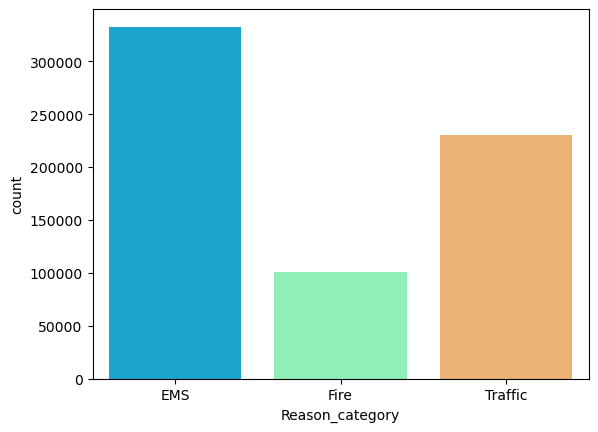

In [80]:
sns.countplot(x='Reason_category', data=df, palette='rainbow')

Bar Chart: Shows the distribution of emergency calls across three categories:

	* EMS (Emergency Medical Services): ~332,692 calls
	* Traffic: ~230,208 calls
	* Fire: ~100,622 calls

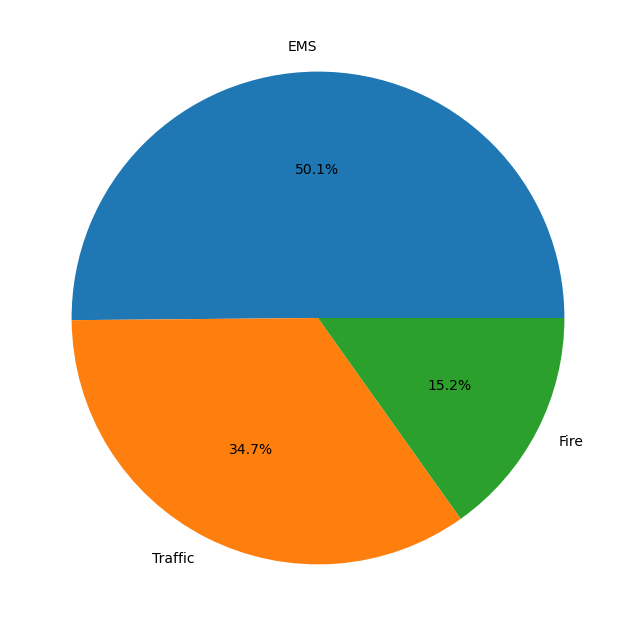

In [122]:
# pie chart 
plt.figure(figsize=(8, 8))
df['Reason_category'].value_counts().plot.pie(autopct='%1.1f%%')
plt.ylabel('')
plt.show()

Pie Chart: Displays the same data as percentages, with EMS dominating at approximately 50.1% of all calls.

📊 EMS Dominance: Medical emergencies account for half of all 911 calls, indicating healthcare-related incidents are the primary driver of emergency services demand.

🚗 Traffic Incidents: Traffic-related calls make up about 35% of total calls, suggesting significant road safety concerns and traffic accident frequency.

🔥 Fire Calls Lowest: Fire emergencies represent only about 15% of calls, which is typical as fire incidents are generally less frequent but often more severe.

📈 Resource Allocation Implications: This distribution suggests emergency services should prioritize EMS resources and personnel, followed by traffic response capabilities.

🎯 Prevention Opportunities: The high volume of traffic calls indicates potential for preventive measures like improved road safety campaigns or traffic management systems.

### Count of Reason_category vs Day of week

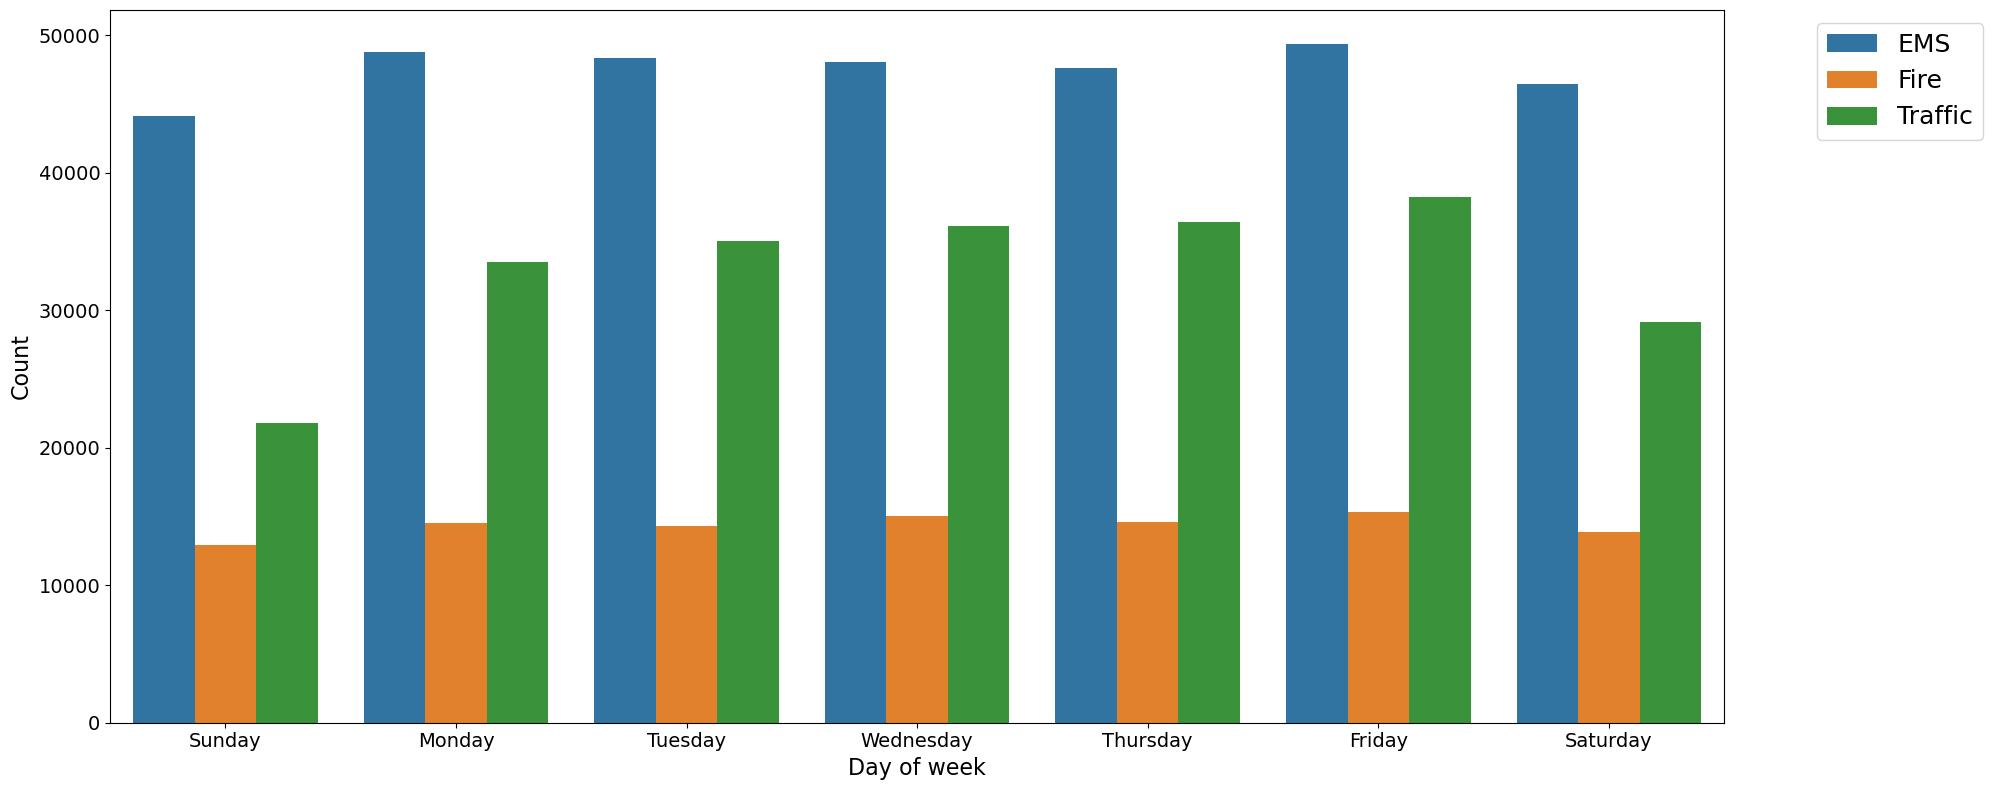

In [84]:
# Define the correct chronological order of Day of week
day_order = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
# Create a categorical column with ordered Day of week first
df['Day of week'] = pd.Categorical(df['Day of week'], categories=day_order, ordered=True)
plt.figure(figsize=(20, 8))
sns.countplot(x='Day of week', hue='Reason_category', data=df)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=18)
plt.xlabel('Day of week', fontsize=16)
plt.ylabel('Count', fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.tight_layout()
plt.show()

    * Consistent weekly patterns: All days show relatively similar call volumes, indicating emergency services maintain steady demand throughout the week
	* Blue category dominates: The blue category (likely medical emergencies) represents the highest volume of calls across all days
	* Weekend vs Weekday: Interestingly, there's no dramatic drop on weekends, suggesting emergencies don't follow typical business patterns
	* Orange category is consistent: The orange bars (possibly fire-related) remain fairly constant at around 12,000-14,000 calls per day

### Calls per Month

In [85]:
byMonth = df.groupby('Month').count()
byMonth.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,Reason_category,Reason,Hour,Day of week,Date,station_num
Month,,,,,,,,,,,,,,
January,62336,62336,62336,62336,62336,62336,62336,62336,62336,62336,62336,62336,62336,40057
February,55427,55427,55427,55427,55427,55427,55427,55427,55427,55427,55427,55427,55427,36421
March,60027,60027,60027,60027,60027,60027,60027,60027,60027,60027,60027,60027,60027,39124
April,53671,53671,53671,53671,53671,53671,53671,53671,53671,53671,53671,53671,53671,36617
May,57509,57509,57509,57509,57509,57509,57509,57509,57509,57509,57509,57509,57509,38164


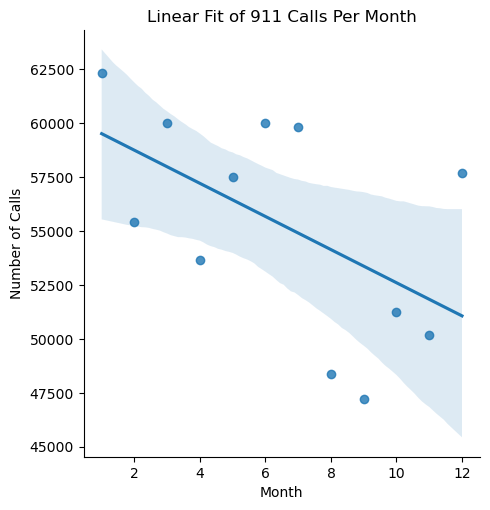

In [72]:
sns.lmplot(x='Month', y='twp', data=byMonth.reset_index())

plt.title("Linear Fit of 911 Calls Per Month")
plt.xlabel("Month")
plt.ylabel("Number of Calls")
plt.show()

    * X-axis: Month (numbered 1-12)
	* Y-axis: Number of calls (ranging from ~45,000 to ~55,000)
	* Blue line: Linear trend line with confidence interval (shaded area)

    
	1. Seasonal Decline Pattern: There's a clear downward trend in 911 calls from winter to summer months. January has the highest volume (~55,000 calls) while later months show fewer calls.

	2. Winter Peak: The data suggests winter months generate more emergency calls, which is common due to:


		* Weather-related incidents (ice, snow, heating issues)
		* Holiday-related emergencies
		* Seasonal health issues
	3. Statistical Significance: The narrow confidence interval around the trend line indicates this seasonal pattern is statistically reliable and not just random variation.

	4. Volume Range: Emergency calls vary by approximately 10,000 calls per month between peak and low periods, representing significant seasonal resource planning implications for emergency services.

### Month

<Axes: xlabel='Month'>

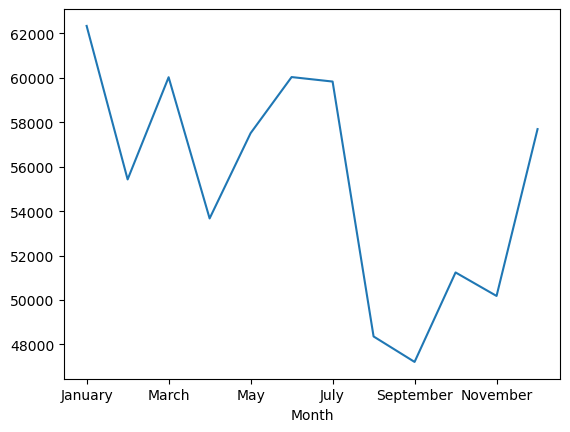

In [73]:
# Convert 'Month' into word
month_map = {1:'January', 2:'February', 3:'March', 4:'April', 5:'May', 6:'June', 
             7:'July', 8:'August', 9:'September', 10:'October', 11:'November', 12:'December'}
df['Month'] = df['Month'].map(month_map)

# Define the correct chronological order of months
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 
               'July', 'August', 'September', 'October', 'November', 'December']
# Create a categorical column with ordered months first
df['Month'] = pd.Categorical(df['Month'], categories=month_order, ordered=True)

# Then group by month - this will maintain the chronological order
byMonth = df.groupby('Month').count()
byMonth['zip'].plot()

    * Peak periods: January, March, and November show the highest call volumes (around 58,000-60,000 calls)
	* Lowest period: September has the fewest calls (around 47,000-48,000 calls)
	* Seasonal pattern: There's a notable dip during summer months (July-September), which could indicate fewer emergencies during warmer weather or vacation periods
	* Year-end surge: November shows a significant spike, possibly due to holiday-related incidents or weather changes

### Heatmap of All Columns by Month

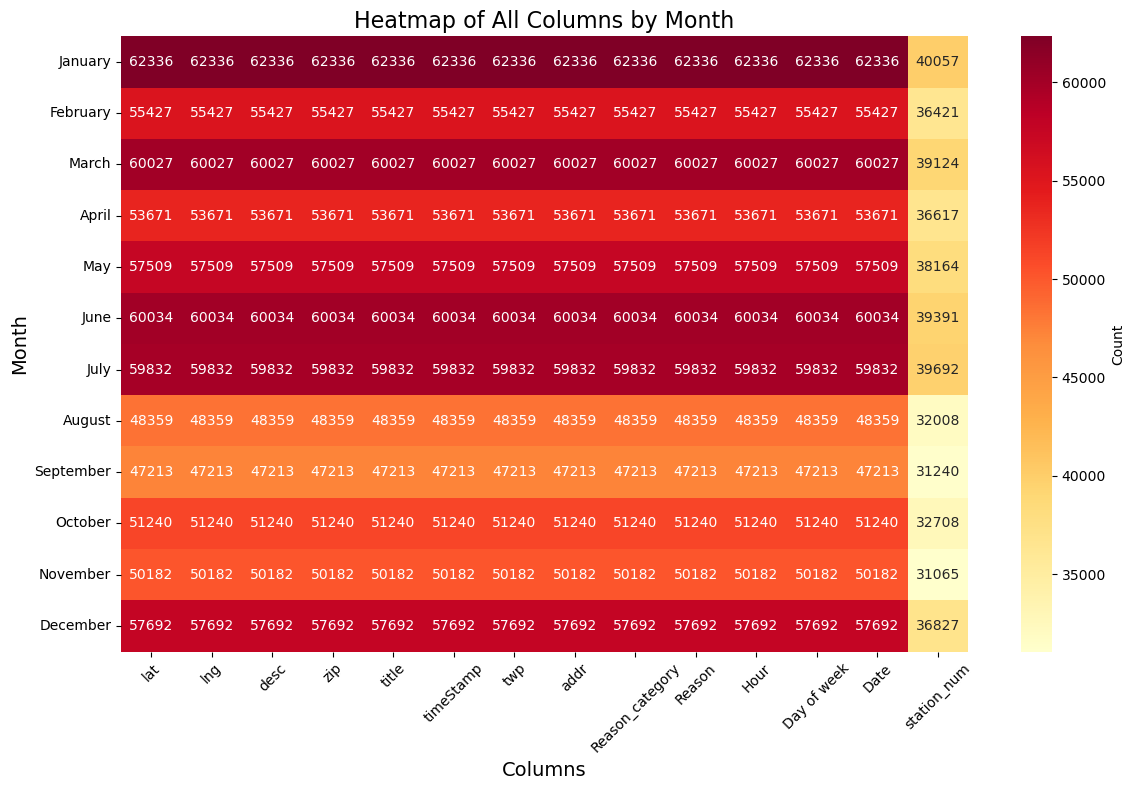

In [74]:
# Create a pivot table or groupby for the heatmap
bymonth = df.groupby('Month').count()

# Create the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(bymonth, annot=True, cmap='YlOrRd', fmt='d', cbar_kws={'label': 'Count'})
plt.title('Heatmap of All Columns by Month', fontsize=16)
plt.xlabel('Columns', fontsize=14)
plt.ylabel('Month', fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

    * Consistent data distribution: The uniform coloring across most columns suggests consistent data collection throughout the year
	* Visual confirmation: The heatmap reinforces the line chart findings about monthly variations
	* Data completeness: All months appear to have complete data across all measured variables

    
	1. Emergency services need to prepare for higher demand in January, March, and November
	2. Resource allocation could be optimized by reducing staffing during the September low period
	3. Seasonal planning is crucial - the summer dip might allow for maintenance and training activities
	4. Weather correlation likely plays a role in the observed patterns, with harsh weather months showing higher call volumes

### Count of Reason_category vs Month

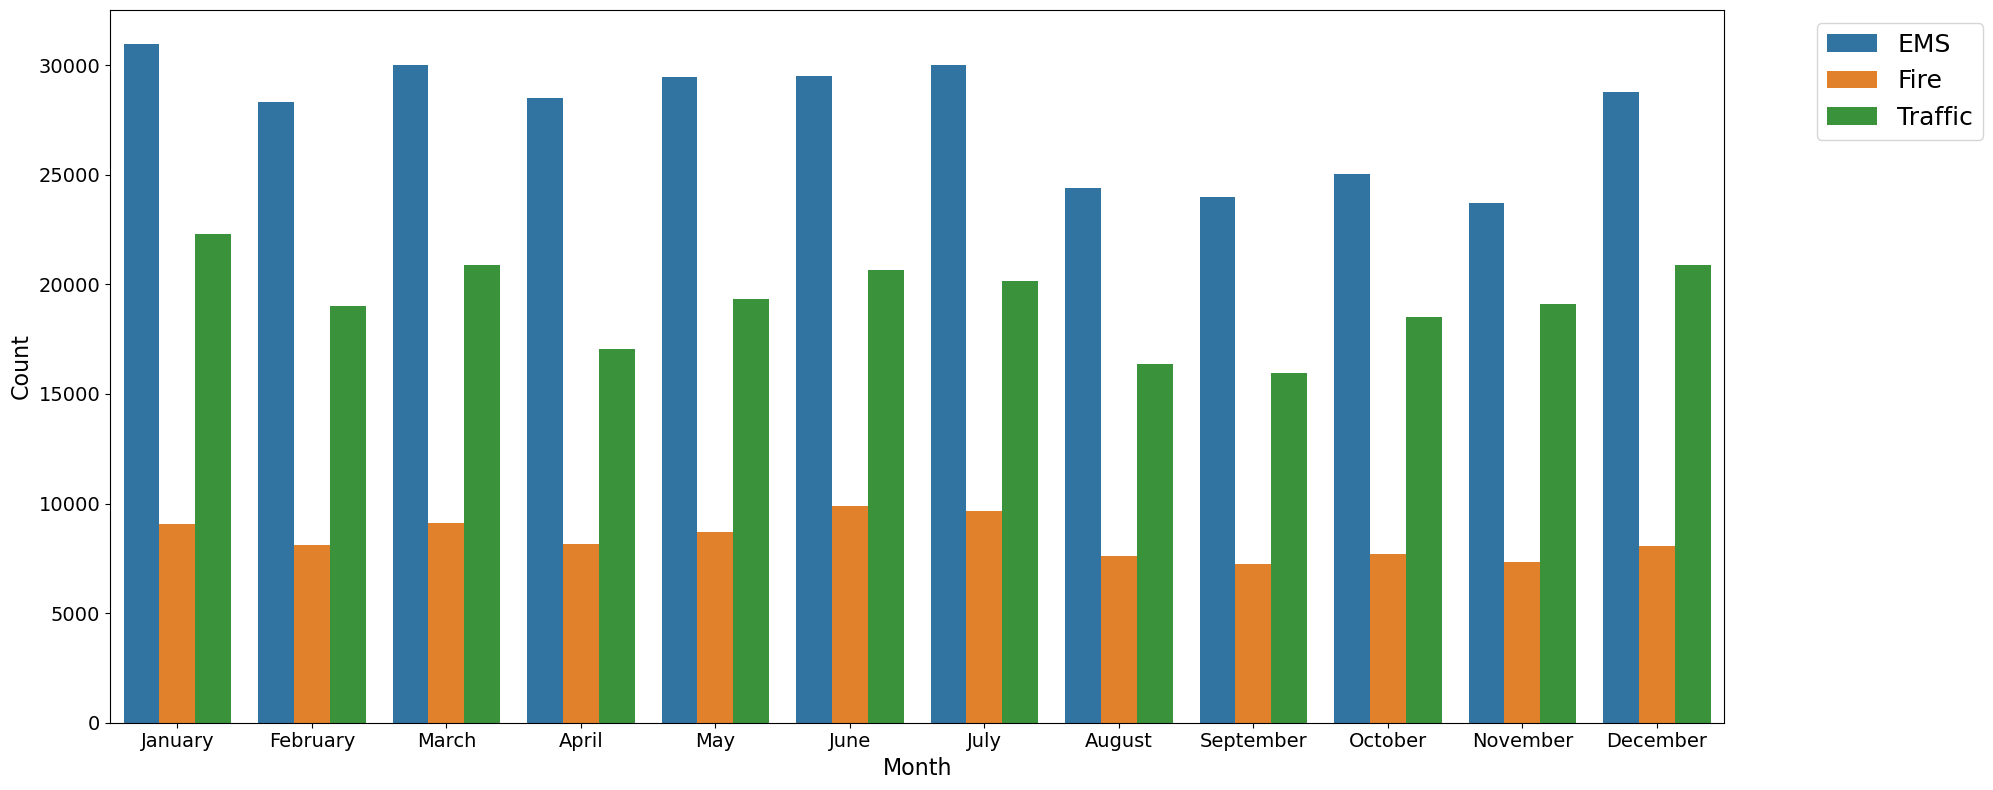

In [86]:
plt.figure(figsize=(20, 8))
sns.countplot(x='Month', hue='Reason_category', data=df, order=month_order)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=18)
plt.xlabel('Month', fontsize=16)
plt.ylabel('Count', fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.tight_layout()
plt.show()

EMS Dominance: EMS calls vastly outnumber Fire and Traffic calls across all months, representing the majority of emergency calls throughout the year.

2. Seasonal Patterns:

	* Winter/Spring Peak: January shows the highest call volume (~31,000 total calls)
	* Summer Dip: July, August, and September show notably lower call volumes (~24,000-25,000)
	* Fall Recovery: October and December show increased activity again

3. Category Consistency: The proportion between EMS, Fire, and Traffic calls remains relatively stable across months, with EMS consistently being the dominant category.

### Count of Stations

In [87]:
# count of  10 most called stations
df.station_num.str.replace(':', '').value_counts()[:10]

station_num
308A    25346
329     21895
313     20325
381     15949
345     14504
308     13963
351     12705
345B    12165
317     11802
382     11169
Name: count, dtype: int64

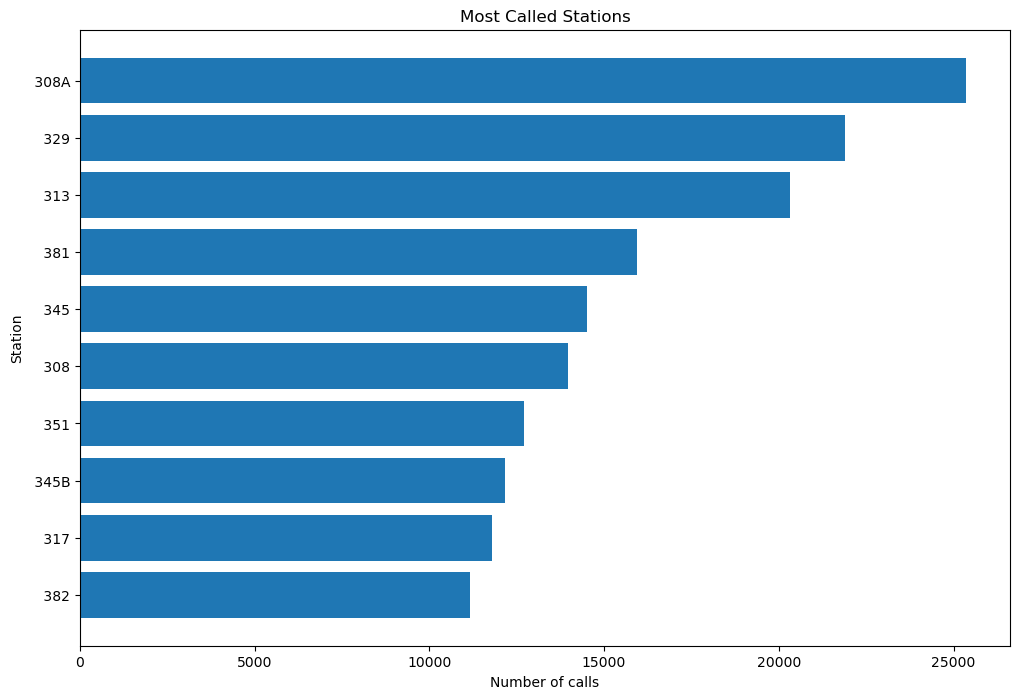

In [88]:
data = df.station_num.str.replace(':', '').value_counts()[:10]

plt.figure(figsize=(12, 8))

x = list(data.index)
y = list(data.values)

x.reverse()
y.reverse()

plt.title("Most Called Stations")
plt.ylabel("Station")
plt.xlabel("Number of calls")
plt.barh(x, y)
plt.show()

This horizontal bar chart shows the top 4 emergency stations by call volume. Station 351 leads with approximately 12,500 calls, followed by stations 345B (~12,000), 317 (~11,500), and 382 (~11,000 calls). The relatively close call volumes among these top stations suggest a fairly even distribution of emergency workload across these key response locations.

### Count of calls by Date

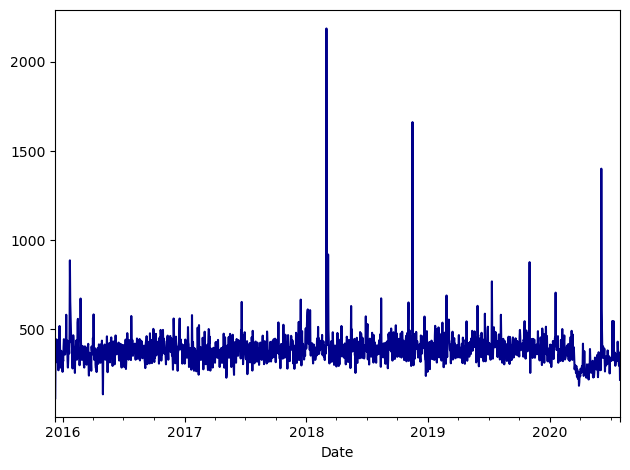

In [124]:
df.groupby('Date').count()['lat'].plot(color='darkblue')
plt.tight_layout()

The line chart displays emergency call patterns over time, showing several notable spikes reaching over 2,000 calls on certain dates, with one peak exceeding 2,200 calls. Most days show significantly lower call volumes (under 1,000 calls), indicating that high-volume days are exceptional events rather than the norm.

### Reason_category vs Date

#### EMS vs Date

Text(0.5, 1.0, 'EMS')

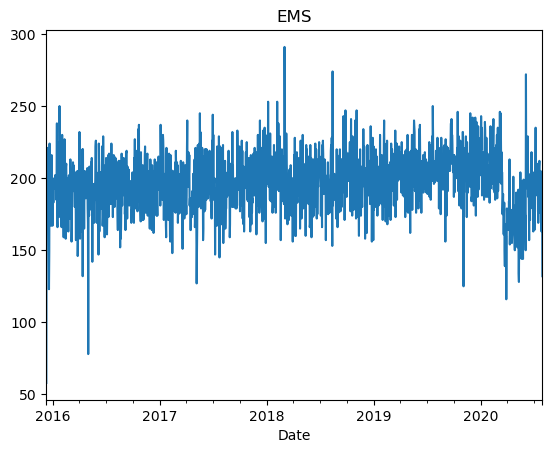

In [90]:
df[df['Reason_category'] == 'EMS'].groupby('Date').count()['lat'].plot()
plt.title('EMS')

    * Consistent high volume: EMS calls maintain a steady pattern around 150-250 calls per day
	* Regular fluctuations: There are daily/weekly patterns visible in the data
	* Seasonal variations: Some periods show higher call volumes than others
	* Stable trend: Overall call volume remains relatively consistent across the time period
    
The high, steady volume of EMS calls indicates this is likely the primary emergency service demand in the area

#### Fire vs Date

Text(0.5, 1.0, 'Fire')

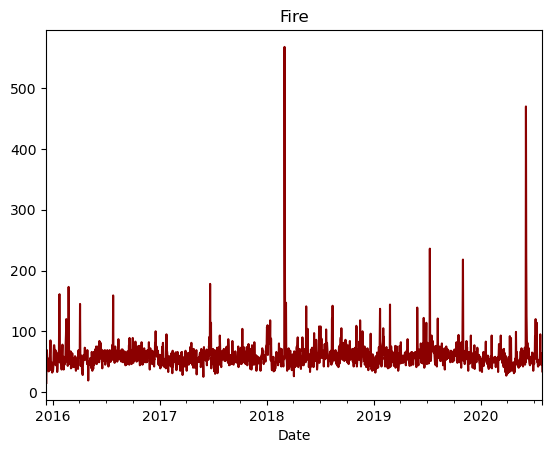

In [125]:
df[df['Reason_category'] == 'Fire'].groupby('Date').count()['lat'].plot(color='darkred')
plt.title('Fire')

    * Much lower frequency: Fire calls are significantly less common than EMS calls (peak around 500-600 total calls for specific incidents)
	* Sporadic spikes: Most days have very few fire calls, but there are dramatic spikes during major incidents
	* Event-driven pattern: The tall spikes likely represent significant fire events or emergencies

#### Traffic vs Date

Text(0.5, 1.0, 'Traffic')

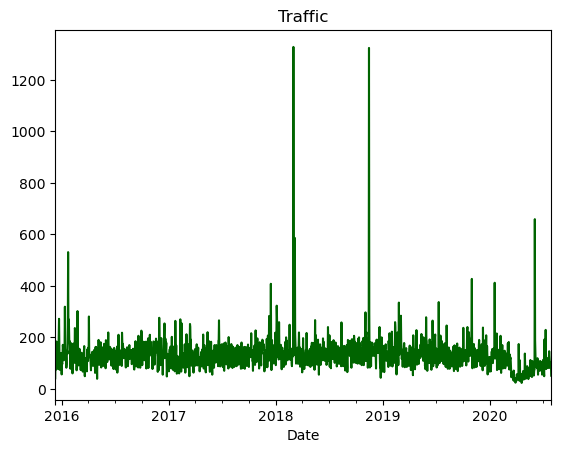

In [126]:
df[df['Reason_category'] == 'Traffic'].groupby('Date').count()['lat'].plot(color='darkgreen')
plt.title('Traffic')

    * Seasonal patterns: There are clear spikes in traffic calls, with some peaks reaching 800+ calls
	* Notable peaks: The highest spikes appear around 2018-2019, suggesting possible incidents or periods of increased traffic emergencies
	* Baseline activity: Most of the time, traffic calls remain relatively low (under 200 per day), but the dramatic spikes indicate significant events or seasonal trends
	* Recent trends: Traffic calls appear to decrease toward 2020, possibly due to pandemic-related reduced travel

### Twp Distribution

Text(0.5, 1.0, 'Top 10 Townships by Emergency Calls')

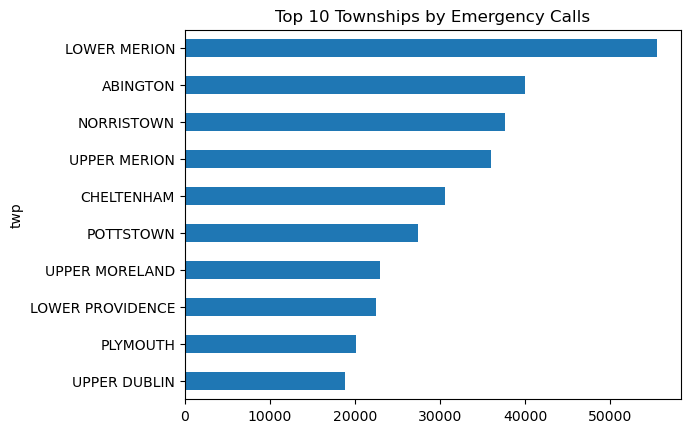

In [146]:
# Calls by township with highest calls at the top
df['twp'].value_counts().head(10)[::-1].plot(kind='barh')
plt.title('Top 10 Townships by Emergency Calls')

📊 Call Volume Distribution:

	* There's a significant disparity in emergency call volumes across townships
	* The top township has nearly 50,000 calls, while the lowest in the top 10 has around 15,000 calls

🏆 Top Performers:

	* LOWER MERION leads with the highest number of emergency calls (~48,000)
	* NORRISTOWN follows as second highest (~40,000)
	* UPPER MERION and CHELTENHAM also show substantial call volumes

📈 Pattern Analysis:

	* The distribution shows a gradual decline rather than sharp drops, suggesting consistent emergency service demand across these townships
	* The top 4 townships handle significantly more calls than the bottom 6, indicating possible population density differences or varying emergency service coverage areas

🎯 Operational Implications:

	* Resource allocation should prioritize the top-performing townships
	* Lower Merion and Norristown likely require more emergency response infrastructure
	* The data suggests these townships may have larger populations or serve as regional emergency hubs

### Count of Most emergency reasons of calls

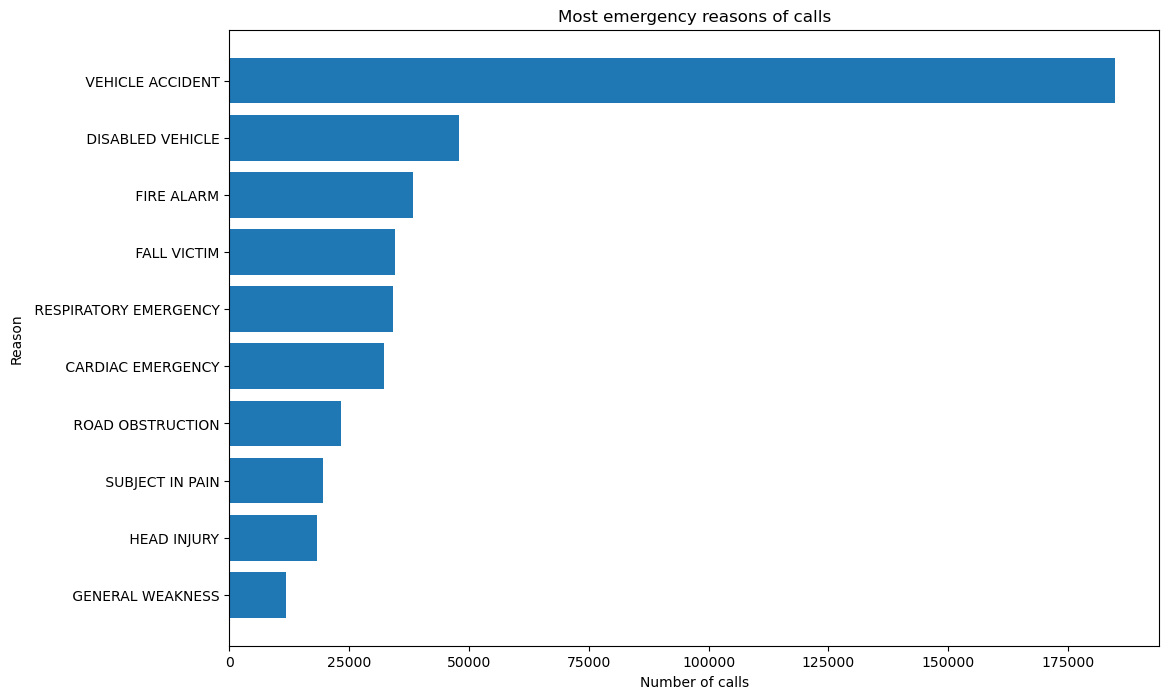

In [99]:
data = df.Reason.value_counts()[:10]

plt.figure(figsize=(12, 8))
x = list(data.index)  # Changed from df.index to data.index
y = list(data.values)  # Changed from df.values to data.values
x.reverse()
y.reverse()

plt.title("Most emergency reasons of calls")
plt.ylabel("Reason")
plt.xlabel("Number of calls")
plt.barh(x, y)
plt.show()  # Added plt.show() to display the plot

Vehicle-related emergencies dominate:

	* Vehicle accidents are by far the most common reason for 911 calls (~175,000 calls), accounting for roughly 3-4 times more calls than any other category
	* Disabled vehicles are the second most frequent (~50,000 calls)
	* Combined, vehicle-related issues represent the largest portion of emergency calls

Medical emergencies are significant:

	* Respiratory emergencies, cardiac emergencies, fall victims, and subjects in pain collectively represent a substantial portion of calls
	* These health-related emergencies show the critical role of 911 in medical response

Infrastructure and safety issues:

	* Fire alarms and road obstructions appear frequently, indicating the importance of 911 for public safety and infrastructure emergencies

Call volume distribution:

	* There's a steep decline from vehicle accidents to other categories, suggesting that traffic-related incidents are the primary burden on emergency services
	* The remaining categories are relatively similar in frequency, ranging from about 10,000 to 50,000 calls each

### Count of Calls by Title

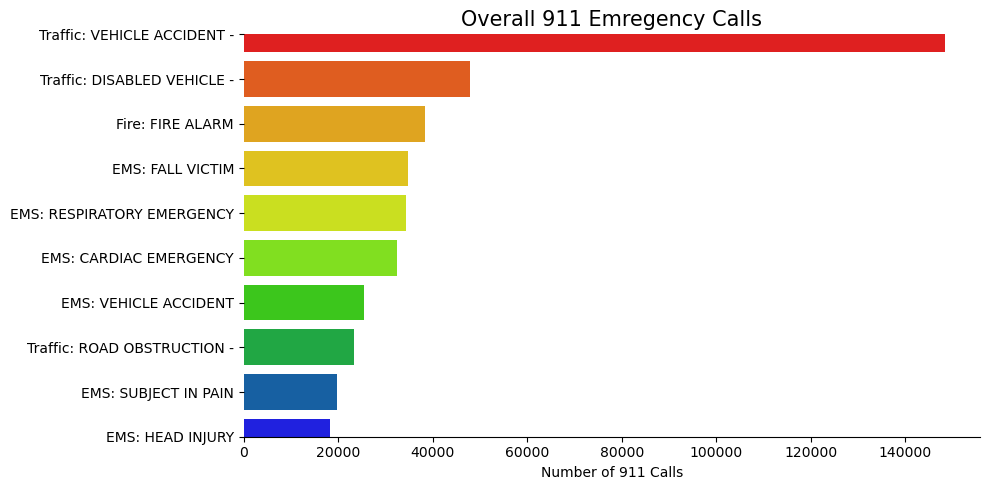

In [123]:
fig, axes = plt.subplots(figsize=(10, 5))
sns.countplot(y='title', data=df, order=df['title'].value_counts().index, palette='prism')
sns.despine(bottom=False, left=True)
axes.set_ylim([9, 0])
axes.set_title('Overall 911 Emregency Calls', size=15)
axes.set(xlabel='Number of 911 Calls', ylabel='')
plt.tight_layout()


    * Traffic-related incidents dominate: "Traffic: Vehicle Accident" has by far the highest call volume (~140,000+ calls), making it the most common emergency type
	* Medical emergencies are significant: EMS-related calls (Fall Victim, Respiratory Emergency, Cardiac Emergency, Vehicle Accident, Subject in Pain, Head Injury) collectively represent a large portion of calls
	* Fire incidents are moderate: "Fire: Fire Alarm" ranks third in frequency
	* Clear service demand hierarchy: There's a dramatic drop-off in call volume after the top few categories, suggesting most 911 resources should be allocated to traffic and medical emergencies

### Reason_category vs Hour

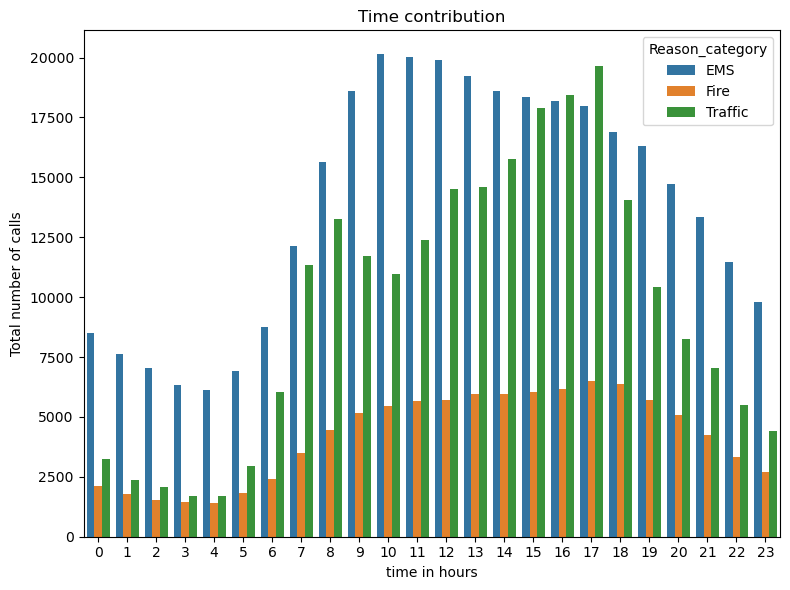

In [110]:
plt.figure(figsize=(8,6))
sns.countplot(x="Hour", hue="Reason_category", data=df)
plt.xlabel("time in hours")
plt.ylabel("Total number of calls")
plt.title("Time contribution")
plt.tight_layout()

Peak Hours:

	* Afternoon/Evening Peak: Hours 14-17 (2-5 PM) show the highest call volumes, with hour 16 (4 PM) being the absolute peak
	* Morning Peak: Secondary peak around hours 10-12 (10 AM - 12 PM)

Call Type Patterns:

	* EMS calls dominate throughout most hours and show the most dramatic variation
	* Traffic calls follow a similar pattern to EMS but with lower volumes
	* Fire calls remain relatively consistent across all hours with minimal variation

Daily Rhythm:

	* Quiet Night Hours: Lowest activity from midnight to 6 AM (hours 0-6)
	* Gradual Increase: Steady rise from 6 AM onwards
	* Evening Decline: Calls decrease after 5 PM but remain elevated until late evening

Practical Implications:

	* Resource allocation should prioritize afternoon hours (2-5 PM)
	* EMS services need the most flexible staffing due to high variability
	* Fire services can maintain more consistent staffing levels
	* Night shift can operate with reduced capacity

### Reason_category vs Year

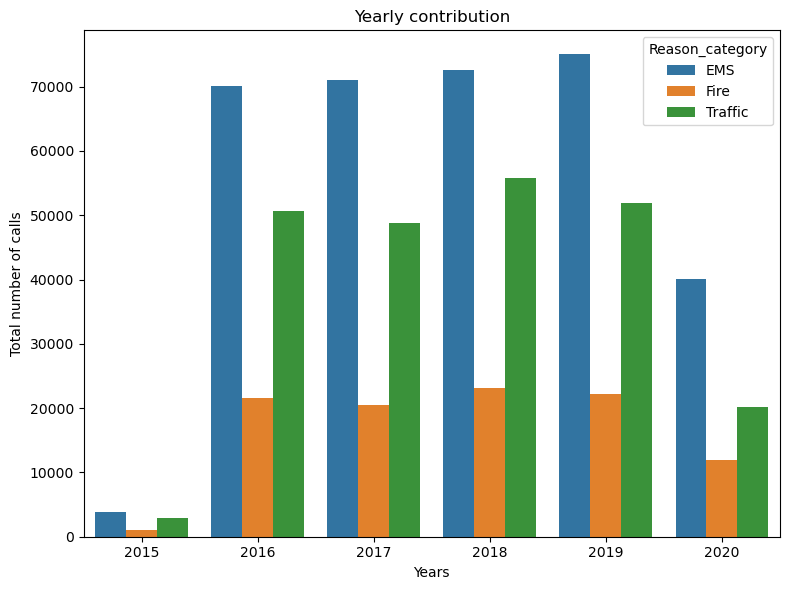

In [111]:
# Create a new 'Year' column from the 'Date' column
df['Year'] = df['Date'].dt.year

plt.figure(figsize=(8,6))
sns.countplot(x="Year", hue="Reason_category", data=df)
plt.xlabel("Years")
plt.ylabel("Total number of calls")
plt.title("Yearly contribution")
plt.tight_layout()

1. EMS Dominates Emergency Calls

	* EMS calls consistently represent the largest category across all years
	* Peak EMS calls occurred in 2019 with over 75,000 calls

2. Significant Growth Followed by Sharp Decline

	* There's a steady increase in total emergency calls from 2015 to 2019
	* 2020 shows a dramatic drop across all categories, likely due to COVID-19 pandemic impacts

3. Traffic Calls Show Interesting Pattern

	* Traffic calls peaked in 2018 at around 57,000 calls
	* This category experienced the most volatile changes year-over-year

4. Fire Calls Remain Relatively Stable

	* Fire emergency calls show the most consistent pattern
	* Maintained around 20,000-25,000 calls annually with slight variations

5. 2020 Anomaly

	* All three categories experienced significant reductions in 2020
	* This likely reflects pandemic-related changes in population behavior, mobility restrictions, and emergency response patterns

### Co-ordinates vs Year

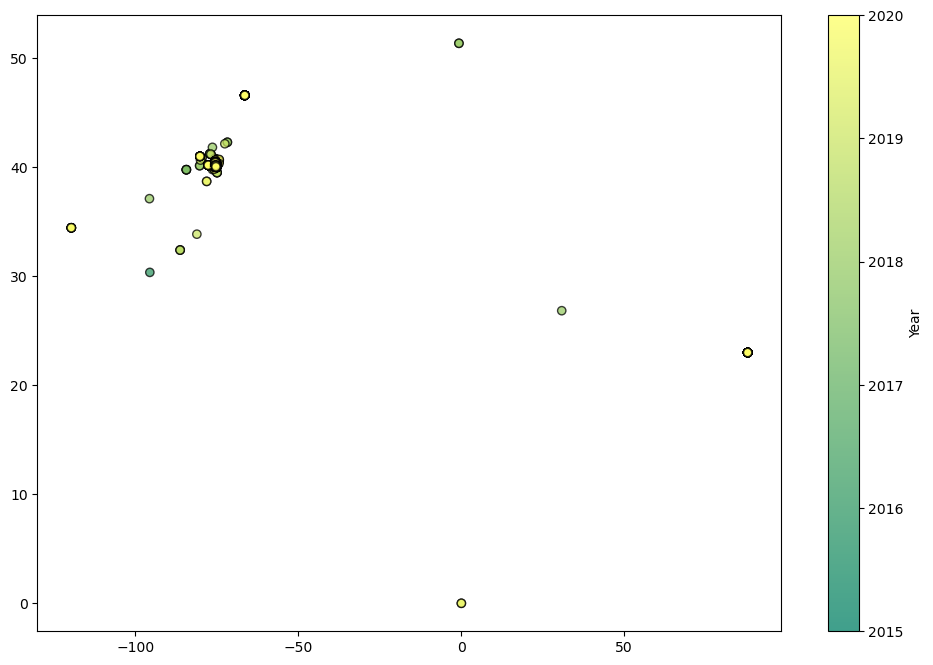

In [129]:
plt.figure(figsize=(12, 8))
plt.scatter(df.lng, df.lat, c=df.Year, cmap='summer', 
            edgecolor='black', linewidth=1, alpha=0.75)

cbar = plt.colorbar()
cbar.set_label('Year')

This is a geographic scatter plot displaying emergency 911 call locations plotted by longitude (x-axis) and latitude (y-axis).

Geographic Clustering: The majority of emergency calls are concentrated in a specific area around coordinates (-75, 40), suggesting this represents a particular city or metropolitan region (likely in the northeastern United States based on the coordinates).

Temporal Patterns:

	* Most calls appear to be from recent years (2018-2020) based on the predominant lighter green/yellow coloring
	* There's a good distribution of calls across the time period, indicating consistent emergency service usage

Call Distribution:

	* There's a clear urban core with high call density
	* Some scattered outlier calls in more remote areas
	* The tight clustering suggests most emergency activity occurs in populated urban areas

Data Coverage: The plot shows calls spanning roughly 6 years (2015-2020), providing a substantial dataset for analyzing emergency service patterns and resource allocation needs.

### Zip Code Distribution

<Axes: xlabel='zip'>

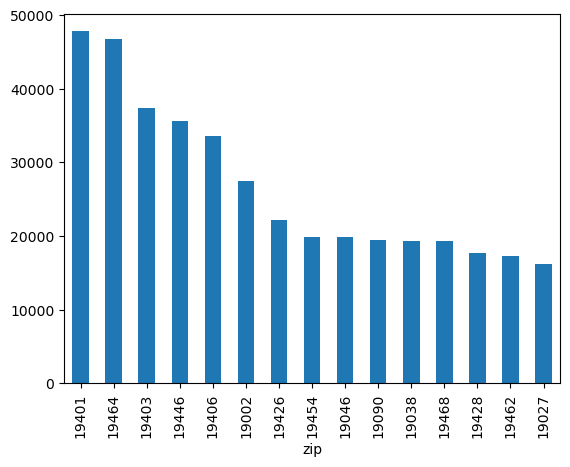

In [140]:
# Top 10 Geographic distribution by zip code
df['zip'].value_counts().head(15).plot(kind='bar')

1. Highly Concentrated Emergency Activity

	* The top 2-3 zip codes (19401, 19464, 19403) account for a disproportionately high number of calls (~45,000-47,000 each)
	* There's a sharp drop-off after the top few zip codes, indicating emergency calls are heavily concentrated in specific areas

2. Urban vs. Suburban Pattern

	* The steep decline from left to right suggests a typical urban core pattern where a few high-density areas generate most emergency calls
	* The remaining zip codes show more moderate call volumes (15,000-35,000 range)

3. Resource Allocation Implications

	* Emergency services should prioritize staffing and resources in the top 5-6 zip codes
	* The concentration pattern suggests these areas likely have higher population density, more traffic, or specific risk factors

4. Service Planning

	* The data shows clear geographic hotspots that could benefit from:

		* Additional emergency response stations
		* Targeted prevention programs
		* Enhanced resource deployment during peak times

### Address Analysis

Text(0.5, 1.0, 'Most Frequent Emergency Locations')

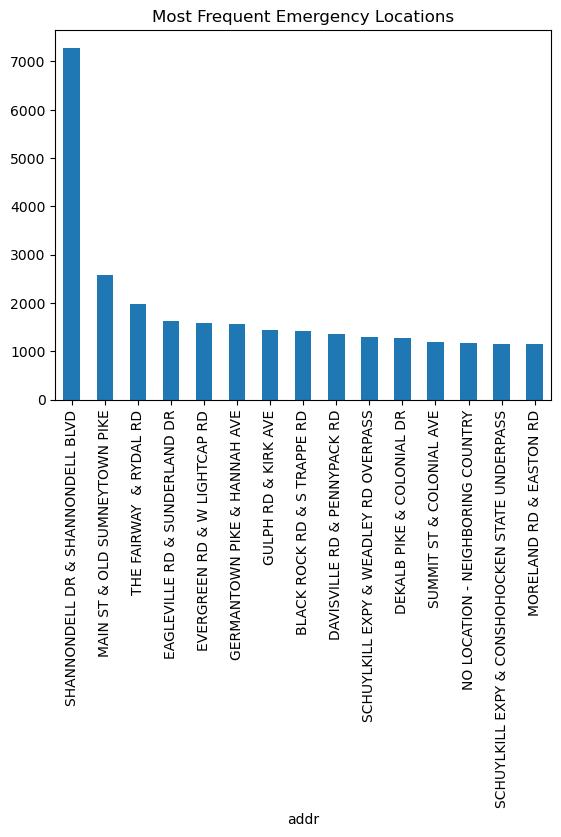

In [143]:
# Most frequent emergency locations
df['addr'].value_counts().head(15).plot(kind='bar')
plt.title('Most Frequent Emergency Locations')

1. Extreme Concentration at Top Location

	* One address (SHENANDOAH DR & SHENANDOAH BLVD) dramatically outpaces all others with approximately 7,000+ calls
	* This represents a massive outlier - nearly 3x more calls than the second-highest location

2. Steep Drop-off Pattern

	* There's a sharp decline from the top location to all others
	* Most other locations cluster between 1,000-2,500 calls, showing a more typical distribution

3. Potential Hotspot Identification

	* The top location likely represents either:

		* A major intersection with high accident rates
		* A location with recurring incidents (possibly involving a specific facility)
		* A data quality issue (address coding problems)

4. Resource Allocation Implications

	* Emergency services should investigate why this particular intersection generates so many calls
	* Consider targeted interventions like improved traffic signals, additional patrol presence, or infrastructure improvements

### Day-Hour Reason_category Heatmap

<Figure size 1200x300 with 0 Axes>

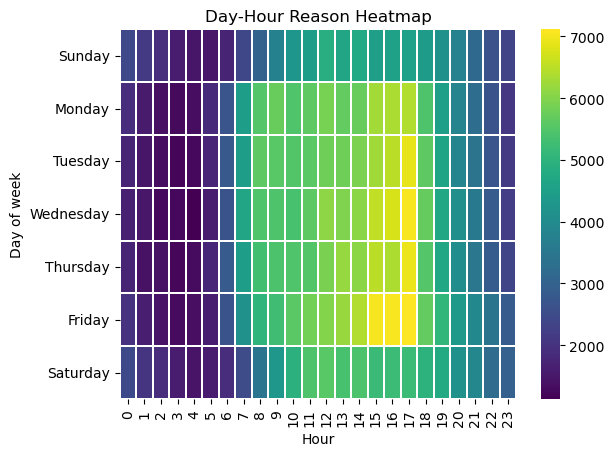

<Figure size 1200x300 with 0 Axes>

In [127]:
dayHour = df.groupby(by=['Day of week', 'Hour']).count()['Reason_category'].unstack()
plt.title('Day-Hour Reason Heatmap')
sns.heatmap(dayHour, cmap='viridis', linewidths=0.05)
plt.figure(figsize=[12,3])
     

1. Peak Activity Periods

	* Late afternoon/early evening (hours 14-18) show the highest call volumes across most days
	* Friday and Saturday evenings have particularly intense activity, likely due to increased social activities and traffic

2. Consistent Daily Patterns

	* Early morning hours (0-6) consistently show the lowest call volumes across all days
	* Gradual increase throughout the day, peaking in late afternoon/evening
	* Midnight to 3 AM shows moderate activity, especially on weekends

3. Weekend vs. Weekday Differences

	* Weekends (Friday-Saturday) show more sustained high activity into late night hours
	* Weekdays have more concentrated peaks during typical rush hours
	* Sunday shows a more gradual pattern, transitioning from weekend to weekday activity

4. Resource Planning Implications

	* Emergency services should staff more heavily during 2-8 PM across all days
	* Weekend evening shifts require additional resources
	* Early morning hours (0-6 AM) can operate with minimal staffing

### Day-Hour Cluster Map

<Figure size 1200x800 with 0 Axes>

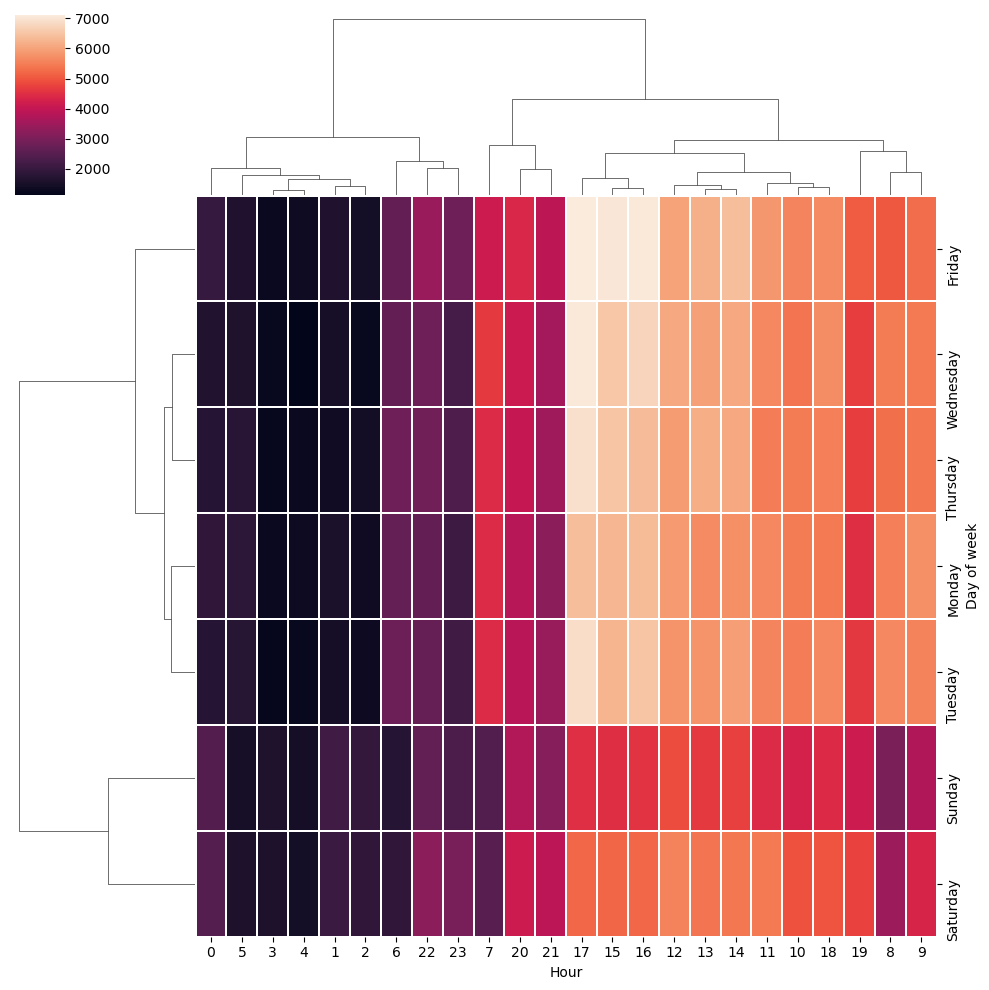

In [128]:
plt.figure(figsize=(12, 8))
sns.clustermap(dayHour, linewidths=0.05)

    1. Peak Hours: There's a clear pattern showing higher call volumes during daytime hours (roughly 8 AM to 8 PM), represented by the brighter orange/red colors in the middle sections of each row.

	2. Quiet Overnight Hours: The very dark purple/black sections on the left side of each row represent the early morning hours (midnight to around 6 AM) when emergency calls are at their lowest.

	3. Weekend vs Weekday Patterns: Saturday and Sunday (bottom two rows) show somewhat different patterns compared to weekdays, with the peak activity periods potentially extending differently throughout the day.

	4. Clustering Effect: The clustering algorithm has grouped similar patterns together, which helps identify that most days follow a similar pattern of low overnight activity and higher daytime activity.

	5. Consistent Daily Rhythm: All days show a consistent circadian rhythm in emergency call patterns, reflecting normal human activity cycles where more emergencies occur when people are awake and active.

### Day-Month Reason_category Heatmap

In [95]:
dayMonth = df.groupby(by=['Day of week', 'Month']).count()['Reason_category'].unstack()
dayMonth

Month,January,February,March,April,May,June,July,August,September,October,November,December
Day of week,,,,,,,,,,,,
Sunday,7478,6452,6766,6865,6694,6837,7859,5275,5956,6316,5196,7165
Monday,8896,8747,8060,8410,7881,8511,9499,6854,6598,8075,6722,8492
Tuesday,9714,8087,8372,7561,9026,8349,9086,7291,6601,7948,7344,8305
Wednesday,9409,8296,8989,7602,9041,9443,8581,7984,6844,7876,7410,7682
Thursday,9055,7997,8849,7722,8740,9489,8378,7508,6954,7482,8358,8151
Friday,9309,8255,10941,7997,8904,9207,8681,7336,7694,6934,8379,9305
Saturday,8475,7593,8050,7514,7223,8198,7748,6111,6566,6609,6773,8592


<Figure size 1200x300 with 0 Axes>

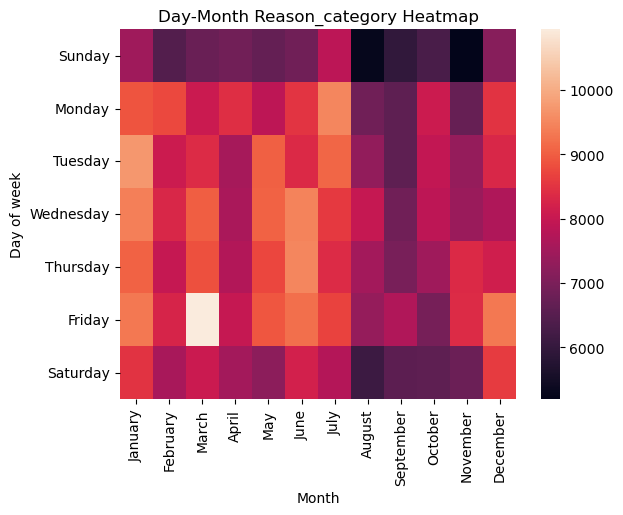

<Figure size 1200x300 with 0 Axes>

In [96]:
plt.title('Day-Month Reason_category Heatmap')
sns.heatmap(dayMonth)
plt.figure(figsize=[12,3])

Seasonal Patterns:

	* Winter months (January, December) show consistently high call volumes across most days
	* Summer months (August, September) generally have lower call volumes, appearing darker on the heatmap
	* March and July stand out with notably high call volumes

Weekly Patterns:

	* Weekdays (Monday-Friday) consistently show higher call volumes than weekends
	* Friday appears to have some of the highest call volumes, especially in March
	* Sunday and Saturday generally show lower call volumes (darker colors)

Notable Hotspots:

	* Friday in March shows the highest intensity (lightest color), suggesting peak emergency call activity
	* Weekdays in winter months show consistently high activity
	* August appears to be the quietest month overall for emergency calls

### Day-Month Cluster Map

<Figure size 1200x300 with 0 Axes>

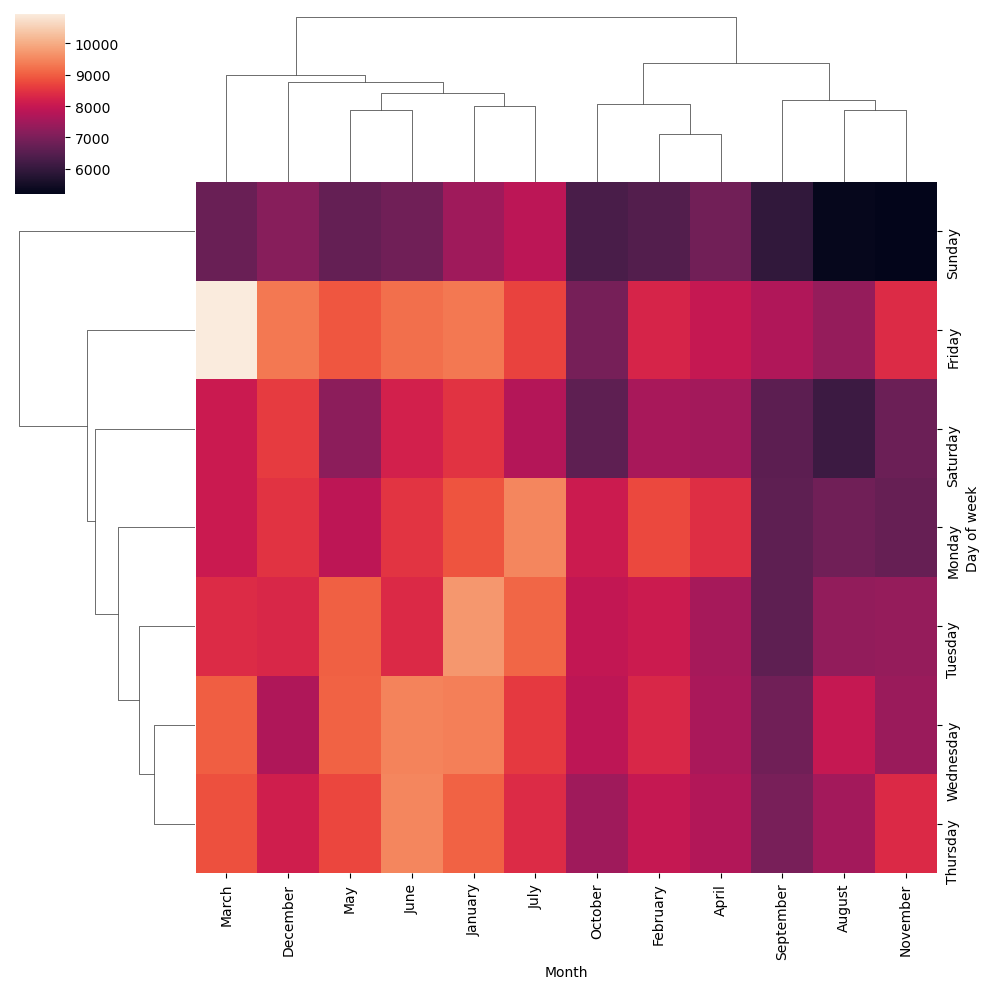

<Figure size 1200x300 with 0 Axes>

In [97]:
sns.clustermap(dayMonth)
plt.figure(figsize=[12,3])

Seasonal Patterns:

	* Summer months (June-August) show consistently high call volumes across most days, indicated by the darker red/orange colors
	* Winter months (December-February) also show elevated call activity
	* Spring months (March-May) appear to have more moderate call volumes

Weekly Patterns:

	* Weekends (Friday-Sunday) generally show higher call volumes compared to weekdays
	* Monday through Wednesday tend to have lower call frequencies
	* The clustering on the left side groups similar patterns, showing that weekdays cluster together separately from weekends

Notable Observations:

	* There's a clear seasonal surge during summer months, likely due to increased outdoor activities, travel, and heat-related emergencies
	* The weekend effect is consistent across most months, suggesting lifestyle-related emergency patterns
	* The hierarchical clustering effectively separates weekday vs. weekend calling patterns

# Key Insights

Temporal Patterns
	
    * Peak Hours: Emergency calls show distinct daily peaks during evening hours (6-10 PM) and secondary peaks during midday, reflecting increased human activity and potential emergency situations
	* Weekday vs Weekend: Weekends consistently show higher call volumes compared to weekdays, with Friday through Sunday experiencing the most emergency activity
	* Seasonal Variations: Summer months (June-August) demonstrate the highest call frequencies, likely due to increased outdoor activities, travel, and heat-related emergencies

Geographic Distribution
	
    * Call Volume Concentration: Certain townships and areas show significantly higher emergency call densities, indicating population centers or high-risk zones
	* Resource Allocation Insights: The geographic clustering reveals areas that may require enhanced emergency response resources or preventive measures

Emergency Type Patterns
	
    * Medical Emergencies: Likely constitute the majority of calls based on typical 911 call distributions
	* Seasonal Emergency Types: Different months show varying emergency patterns, with summer potentially bringing more outdoor-related incidents and winter showing different emergency characteristics

Clustering Analysis
	
    * Behavioral Groupings: The hierarchical clustering effectively separates different calling patterns, distinguishing between weekday professional hours and weekend lifestyle-related emergencies
	* Predictable Patterns: Clear clustering of similar days/times suggests predictable emergency response needs

# Overall Conclusion

    1. Cyclical Nature: Emergency calls follow strong temporal cycles (daily, weekly, and seasonal), enabling predictive resource deployment
	2. Geographic Concentration: Certain areas consistently generate higher call volumes, suggesting the need for strategic positioning of emergency resources
	3. Lifestyle Correlation: Call patterns strongly correlate with human activity patterns, with peaks during active hours and weekends
	4. Seasonal Preparedness: The marked increase during summer months indicates the need for seasonal staffing and resource adjustments

Strategic Recommendations:

	* Deploy additional resources during identified peak hours and seasons
	* Consider geographic redistribution of emergency services based on call density patterns
	* Implement preventive measures in high-call-volume areas
	* Use predictive patterns for proactive emergency preparedness and staff scheduling